In [187]:
import os
import pandas as pd
import nbformat

In [188]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/'

In [189]:
df=pd.read_csv('blockdesignscore.csv')

In [190]:
action_wais_df=pd.read_csv('Action_Wais.csv')

In [191]:
# Strip trailing spaces from column names in action_wais_df
action_wais_df.columns = action_wais_df.columns.str.strip()

# Rename 'Q1' to 'Participant' in wais_selected_df
wais_selected_df = df[['Q1', 'Block Design raw']].rename(columns={'Q1': 'Participant', 'Block Design raw': 'Block Design Raw Score'})

A_Wais_Score= pd.merge(action_wais_df, wais_selected_df, on='Participant', how='inner')

A_Wais_Score.head(20)


,Participant,Block Design Raw Score
0,C001,36
1,C003,58
2,C006,42
3,C008,"32 (no time bonus), 34 (with time bonus)"
4,C009,24
5,C012,54
6,C013,48
7,C016,39
8,C017,36
9,C020,30


In [192]:
A_Wais_Score.at[3, 'Block Design Raw Score'] = '34'

In [193]:
A_Wais_Score.to_csv('A_BDScore.csv')

#### Extracting features and merging all participants - Total Actions, Time Spent, Total Missed Interactions

In [194]:
# List to store the dataframes
dfs = []

# Function to execute cells and extract totals_df
def extract_totals_df(nb):
    exec_env = {}
    totals_df = None
    plot_keywords = ['plt.', 'plotly.', 'seaborn.']
    # Execute all cells to set up the environment
    for cell in nb.cells:
        if cell.cell_type == 'code':
            if any(keyword in cell.source for keyword in plot_keywords):
                continue  # Skip cells that generate plots
            try:
                exec(cell.source, exec_env)
            except Exception as e:
                print(f"Error executing cell: {cell.source}\n{e}")

    # Extract totals_df
    totals_df = exec_env.get('totals_df')
    return totals_df

# Process each notebook file
for filename in os.listdir(directory):
     if filename.endswith("_ActionSteps.ipynb"):
        filepath = os.path.join(directory, filename)
        print(f"Processing file: {filepath}")
        
        with open(filepath) as f:
            nb = nbformat.read(f, as_version=4)
        
        totals_df = extract_totals_df(nb)
        
        if totals_df is not None:
            print(f"Extracted totals_df from {filename}")
            dfs.append(totals_df)
        else:
            print(f"No totals_df found in {filename}")


combined_df = pd.concat(dfs)
merged_df = pd.read_csv('A_BDScore.csv')
final_df = pd.merge(merged_df, combined_df, on='Participant', how='left')
final_df = final_df.drop(columns=[col for col in final_df.columns if 'Unnamed' in col])


Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C001A_ActionSteps.ipynb
Extracted totals_df from C001A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C003A_ActionSteps.ipynb
Extracted totals_df from C003A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C006D_ActionSteps.ipynb
Extracted totals_df from C006D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C008D_ActionSteps.ipynb
Extracted totals_df from C008D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C009A_ActionSteps.ipynb
Extracted totals_df from C009A_ActionSteps.ipynb
Processing file: C:/Users/FANNY MARIA D SOUZA/Capstone/Action_CompletedSteps_SimpleStew/C012D_ActionSteps.ipynb
Extracted totals_df from C012D_ActionSteps.ipynb
Processing file: C:/Users/FANNY MA

In [195]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions
0,C001,36,180,241.813972,3.0
1,C003,58,212,368.939742,13.0
2,C006,42,216,258.609221,45.0
3,C008,34,290,316.882270,9.0
4,C009,24,344,450.877417,16.0
5,C012,54,163,240.627667,1.0
6,C013,48,314,530.895012,35.0
7,C016,39,183,185.527859,16.0
8,C017,36,218,335.729737,12.0
9,C020,30,212,320.340694,1.0


In [196]:
final_df = final_df.drop([14])


In [197]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions
0,C001,36,180,241.813972,3.0
1,C003,58,212,368.939742,13.0
2,C006,42,216,258.609221,45.0
3,C008,34,290,316.882270,9.0
4,C009,24,344,450.877417,16.0
5,C012,54,163,240.627667,1.0
6,C013,48,314,530.895012,35.0
7,C016,39,183,185.527859,16.0
8,C017,36,218,335.729737,12.0
9,C020,30,212,320.340694,1.0


#### Scatter Plot between Block Design Score and Total Actions

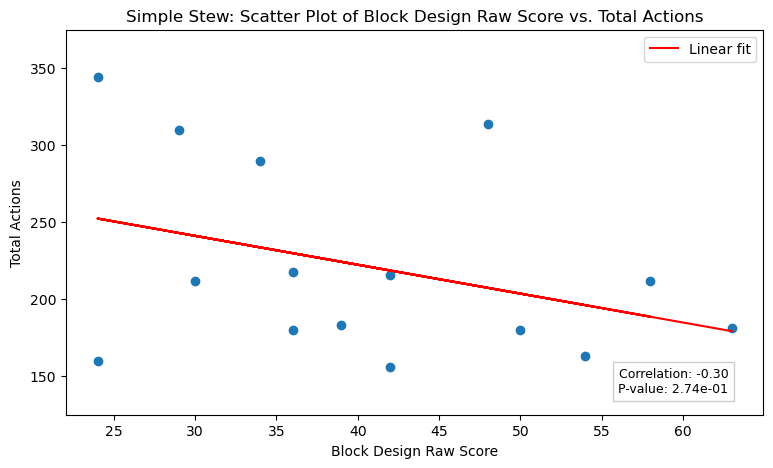

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Actions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Actions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Actions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Actions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Actions')
plt.ylim(125,375)
plt.legend()
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone/'
folder_path = os.path.join(directory, 'Plots/Scatterplot_SimpleStew')


file_path = os.path.join(folder_path, '1 SS_TotalActions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Scatter Plot between Block Design Score and Total Missed Interactions

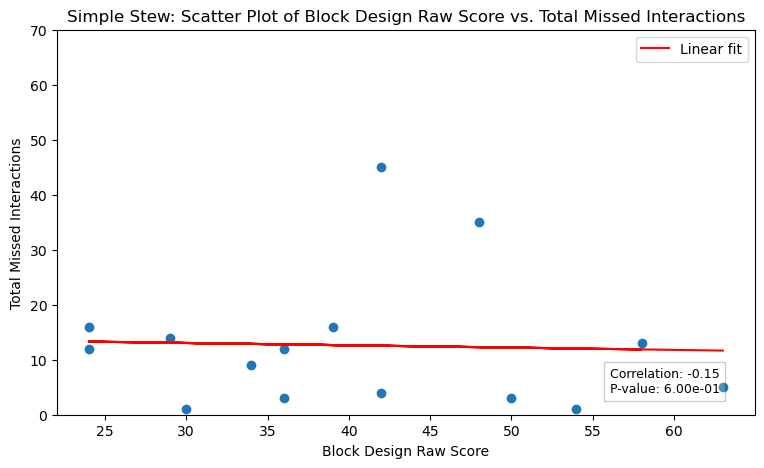

In [199]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Missed Interactions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Missed Interactions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Missed Interactions')
plt.ylim(0,70)
plt.legend()
file_path = os.path.join(folder_path, '2 SS_TotalMissedInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Scatter Plot between Block Design Score and Total Time Spent

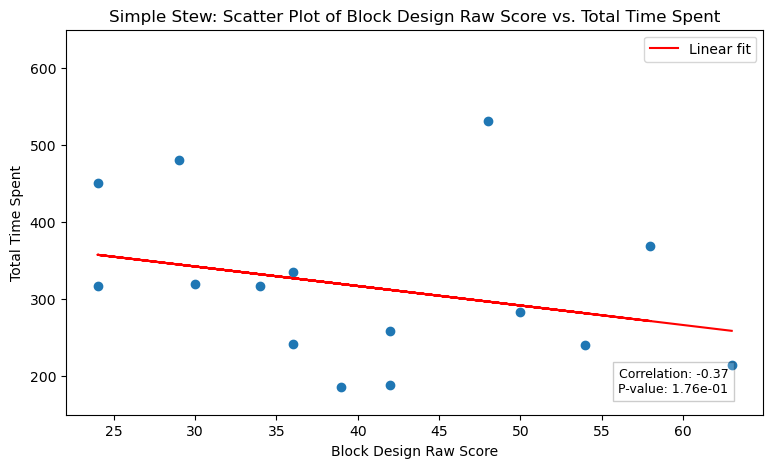

In [200]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Time Spent'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Time Spent'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Time Spent'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Time Spent')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Time Spent')
plt.ylim(150,650)
plt.legend()
file_path = os.path.join(folder_path, '3 SS_TotalTimeSpent.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [201]:
Int_ob=pd.read_csv('InteractedObjects_SimpleStew.csv')
Int_ob

,Unnamed: 0,C001,C003,C006,C008,C009,C012,C013,C016,C017,C020,C021,C024,C025,C028,C029,C032
0,knife,28,26,18,50,68,20,54,20,44,42,48,20,16,26,60,22
1,carrot,23,8,12,9,16,6,15,6,8,8,6,6,6,9,18,6
2,beefstewcookbook,10,39,10,27,23,9,12,11,10,19,39,9,9,8,8,9
3,brothparent,8,20,2,4,4,2,8,4,6,4,10,2,2,2,0,4
4,onion,22,24,18,39,25,25,26,17,22,20,31,16,16,29,19,22
5,meat,21,16,35,55,87,36,46,44,47,38,75,35,34,38,37,54
6,stirspoonsimple,4,2,2,4,8,2,10,4,2,4,4,2,2,4,2,2
7,tomato,16,14,15,24,39,14,18,16,15,17,15,14,14,14,68,14
8,carrottopquarter2,5,4,2,5,6,4,4,4,4,5,5,5,4,4,4,4
9,potato,14,14,18,13,18,20,18,15,14,20,19,15,16,14,19,14


In [202]:
total_interactions = Int_ob.iloc[-1, 1:].astype(int)

# Create a DataFrame for total interactions
total_interactions_df = pd.DataFrame(total_interactions).reset_index()
total_interactions_df.columns = ['Participant', 'Total Object Interactions']

# Ensure participant column format matches final_df
total_interactions_df['Participant'] = total_interactions_df['Participant'].str.upper()
total_interactions_df


,Participant,Total Object Interactions
0,C001,177
1,C003,199
2,C006,171
3,C008,281
4,C009,328
5,C012,162
6,C013,279
7,C016,167
8,C017,206
9,C020,211


In [203]:
final_df= pd.merge(final_df, total_interactions_df, on='Participant', how='left')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions
0,C001,36,180,241.813972,3.0,177
1,C003,58,212,368.939742,13.0,199
2,C006,42,216,258.609221,45.0,171
3,C008,34,290,316.882270,9.0,281
4,C009,24,344,450.877417,16.0,328
5,C012,54,163,240.627667,1.0,162
6,C013,48,314,530.895012,35.0,279
7,C016,39,183,185.527859,16.0,167
8,C017,36,218,335.729737,12.0,206
9,C020,30,212,320.340694,1.0,211


#### Scatter Plot between Block Design Score and Total Object Interactions

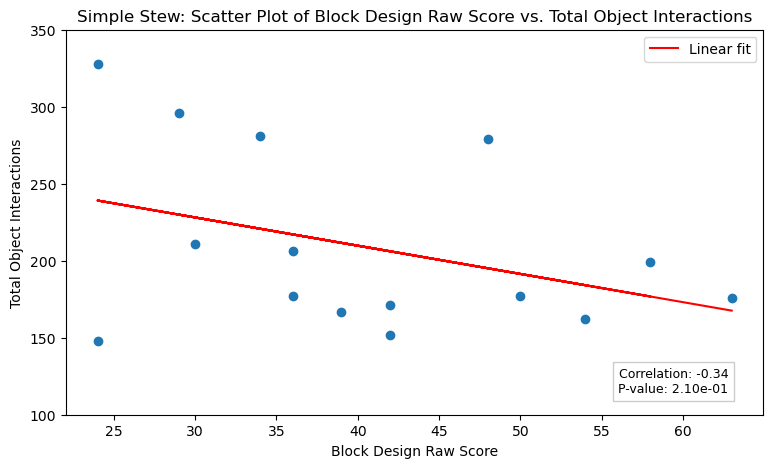

In [204]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Object Interactions'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Object Interactions'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Object Interactions'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Object Interactions')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Object Interactions')
plt.ylim(100,350)
file_path = os.path.join(folder_path, '4 SS_TotalObjectInteractions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

#### Block Design Score and Time Variability among Participants

In [205]:
time_variability=pd.read_csv('TimeVariability_SimpleStew.csv')

In [206]:
time_variability = time_variability[['Participant', 'Time Spent S.D']]
final_df=pd.merge(final_df, time_variability, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D
0,C001,36,180,241.813972,3.0,177,19.373010
1,C003,58,212,368.939742,13.0,199,35.630609
2,C006,42,216,258.609221,45.0,171,19.902276
3,C008,34,290,316.882270,9.0,281,20.357014
4,C009,24,344,450.877417,16.0,328,47.383847
5,C012,54,163,240.627667,1.0,162,14.958293
6,C013,48,314,530.895012,35.0,279,35.520103
7,C016,39,183,185.527859,16.0,167,11.689684
8,C017,36,218,335.729737,12.0,206,25.446555
9,C020,30,212,320.340694,1.0,211,17.424497


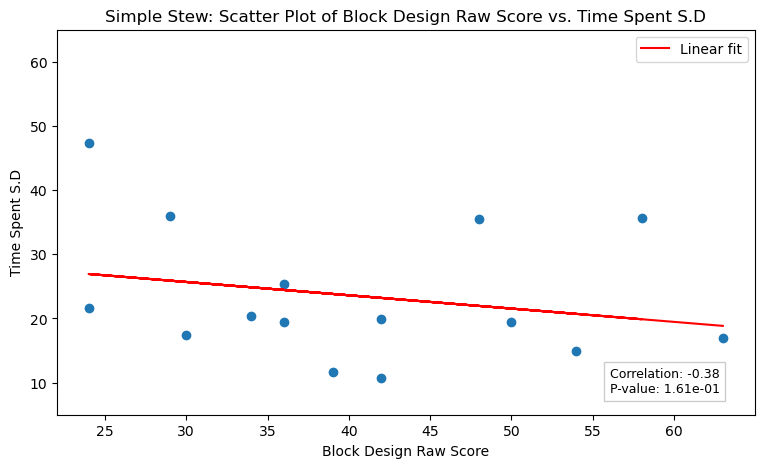

In [207]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Time Spent S.D'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Time Spent S.D'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Time Spent S.D'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Time Spent S.D')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Time Spent S.D')
plt.ylim(5,65)
plt.legend()
file_path = os.path.join(folder_path, '5 SS_TimeVariability.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Action Count Variability

In [208]:
action_variability=pd.read_csv('ActionCountVariability_SimpleStew.csv')

In [209]:
action_variability = action_variability[['Participant', 'Action Count S.D']]
final_df=pd.merge(final_df, action_variability, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442


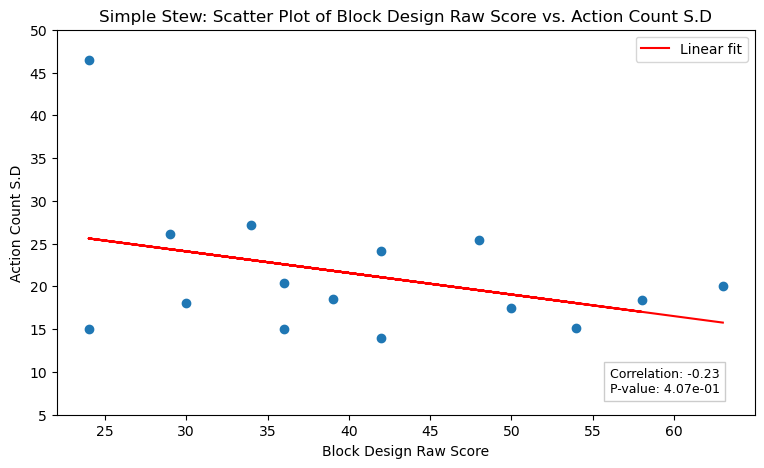

In [210]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Action Count S.D'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Action Count S.D'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Action Count S.D'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Action Count S.D')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count S.D')
plt.ylim(5,50)
plt.legend()
file_path = os.path.join(folder_path, '6 SS_ActionVariability.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block Design Score and Total Completed Steps

In [211]:
totalsteps=pd.read_csv('TotalCompletedSteps_SimpleStew.csv')

In [212]:
totalsteps = totalsteps[['Participant', 'Total Completed Steps']]
final_df=pd.merge(final_df, totalsteps, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296,28
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909,28
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800,28
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685,32
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259,28
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096,32
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409,30
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559,32
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090,28
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442,28


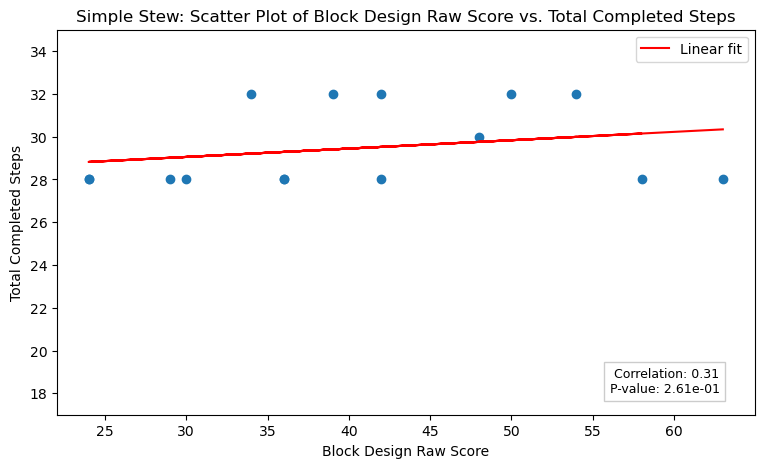

In [213]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Total Completed Steps'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Total Completed Steps'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Total Completed Steps'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Total Completed Steps')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Total Completed Steps')
plt.ylim(17,35)
plt.legend()
file_path = os.path.join(folder_path, '7 SS_TotalCompletedSteps.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Block design score and Action Count under every step

In [214]:
actionstep=pd.read_csv('ActionCountVariability_SimpleStew.csv')

In [215]:
Action_step = actionstep[['Participant', 'Add Onion','Add Tomtato','Add Beef','Add Carrot','Add Potato']]
final_df=pd.merge(final_df, Action_step, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Add Onion,Add Tomtato,Add Beef,Add Carrot,Add Potato
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296,28,33,25,35,40,23
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909,28,35,18,59,35,19
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800,28,26,24,33,83,23
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685,32,55,34,72,70,17
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259,28,0,32,153,63,27
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096,32,28,20,42,35,22
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409,30,48,29,74,64,22
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559,32,24,21,60,35,21
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090,28,57,26,49,40,20
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442,28,54,23,30,40,33


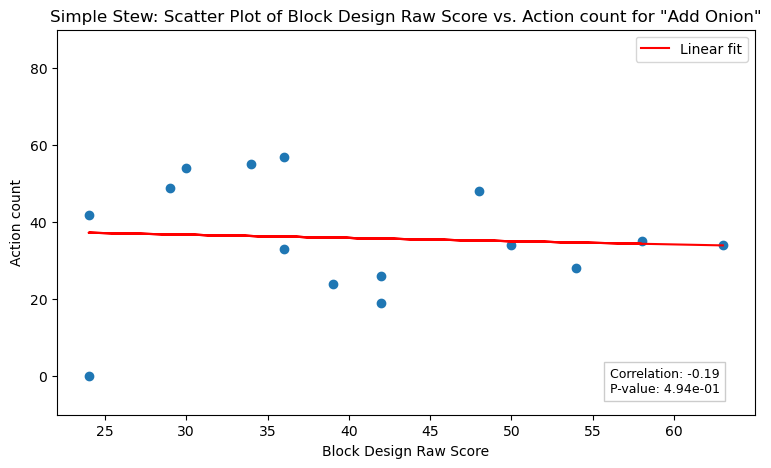

In [216]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Onion'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Onion'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Onion'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Action count for "Add Onion"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(-10,90)
plt.legend()
file_path = os.path.join(folder_path, '8 SS_CountAddOnion.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

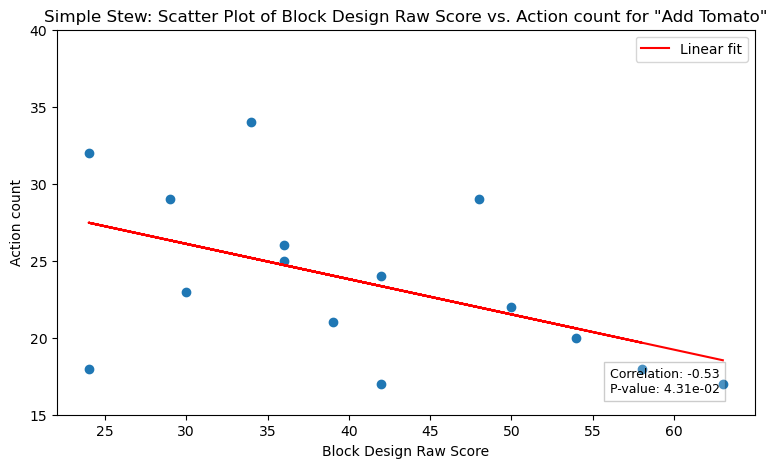

In [217]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Tomtato'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Tomtato'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Tomtato'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Action count for "Add Tomato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(15,40)
plt.legend()
file_path = os.path.join(folder_path, '9 SS_CountAddTomato.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

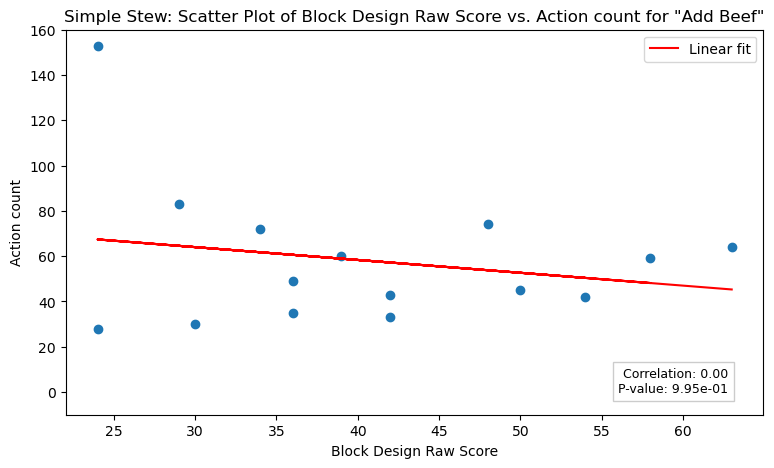

In [218]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Beef'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Beef'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Beef'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Action count for "Add Beef"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(-10,160)
plt.legend()
file_path = os.path.join(folder_path, '10 SS_CountAddBeef.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

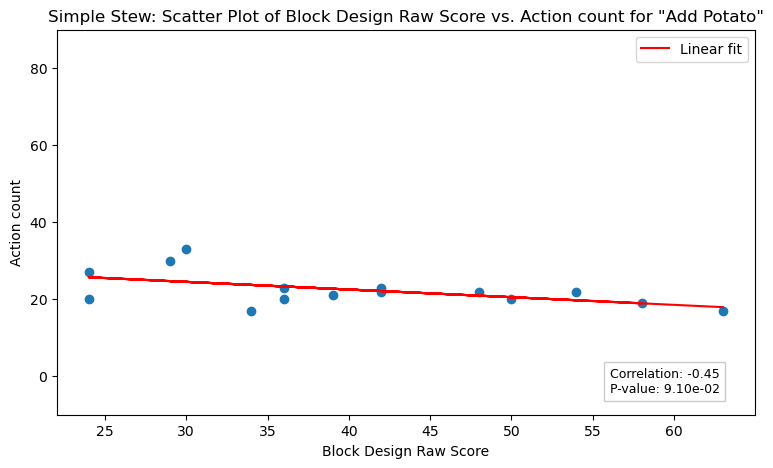

In [248]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Potato'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Potato'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Potato'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Action count for "Add Potato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(-10,90)
plt.legend()
file_path = os.path.join(folder_path, '11 SS_CountAddPotato.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

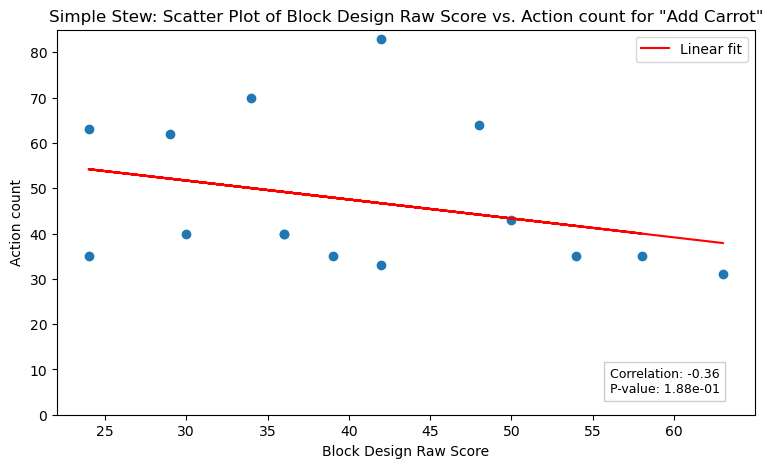

In [249]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Add Carrot'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Action count for "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action count')
plt.ylim(0,85)
plt.legend()
file_path = os.path.join(folder_path, '12 SS_CountAddCarrot.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

In [221]:
#final_df.to_csv('Features_SimpleStew.csv', index=False)

#### Error to Action Ratio

In [222]:
final_df['Error to Actions Ratio'] = final_df['Total Missed Interactions'] / final_df['Total Actions']

In [223]:
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Add Onion,Add Tomtato,Add Beef,Add Carrot,Add Potato,Error to Actions Ratio
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296,28,33,25,35,40,23,0.016667
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909,28,35,18,59,35,19,0.061321
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800,28,26,24,33,83,23,0.208333
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685,32,55,34,72,70,17,0.031034
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259,28,0,32,153,63,27,0.046512
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096,32,28,20,42,35,22,0.006135
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409,30,48,29,74,64,22,0.111465
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559,32,24,21,60,35,21,0.087432
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090,28,57,26,49,40,20,0.055046
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442,28,54,23,30,40,33,0.004717


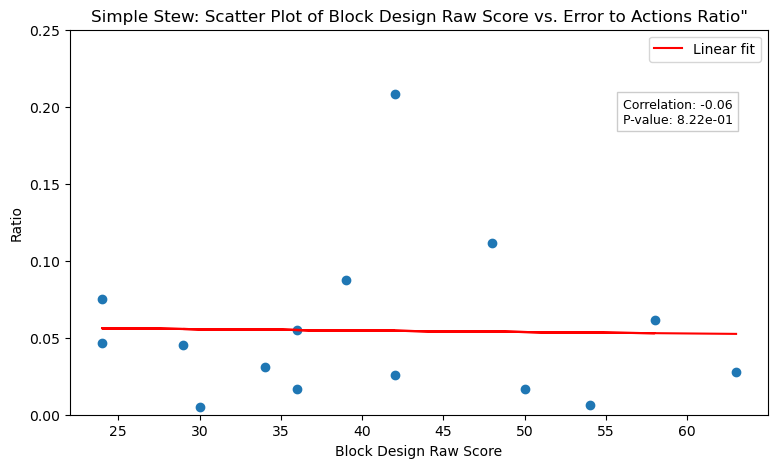

In [251]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Error to Actions Ratio'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Error to Actions Ratio"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Ratio')
plt.legend()
plt.ylim(0,0.25)
file_path = os.path.join(folder_path, '14 SS_CountErrortoActions.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Action type & Block design score

In [225]:
action_type=pd.read_csv('ActionType_SimpleStew.csv')

In [226]:
action_type = action_type[['Participant', 'Chopped','Left Hand Grab','Left Hand Released','Right Hand Grab','Right Hand Released']]
final_df=pd.merge(final_df, action_type, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Add Onion,Add Tomtato,Add Beef,Add Carrot,Add Potato,Error to Actions Ratio,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296,28,33,25,35,40,23,0.016667,19,18,16,69,58
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909,28,35,18,59,35,19,0.061321,25,37,14,83,53
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800,28,26,24,33,83,23,0.208333,38,18,9,99,52
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685,32,55,34,72,70,17,0.031034,38,38,29,111,74
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259,28,0,32,153,63,27,0.046512,37,48,33,127,99
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096,32,28,20,42,35,22,0.006135,31,7,6,64,55
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409,30,48,29,74,64,22,0.111465,39,56,38,107,74
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559,32,24,21,60,35,21,0.087432,33,36,26,53,35
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090,28,57,26,49,40,20,0.055046,27,30,24,77,60
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442,28,54,23,30,40,33,0.004717,40,17,17,80,58


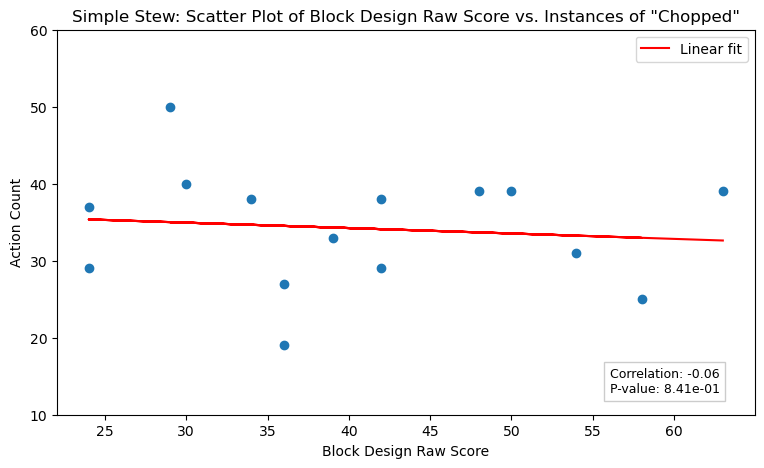

In [252]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Chopped'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Chopped'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Chopped'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Instances of "Chopped"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(10,60)
file_path = os.path.join(folder_path, '15 SS_CountChopped.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

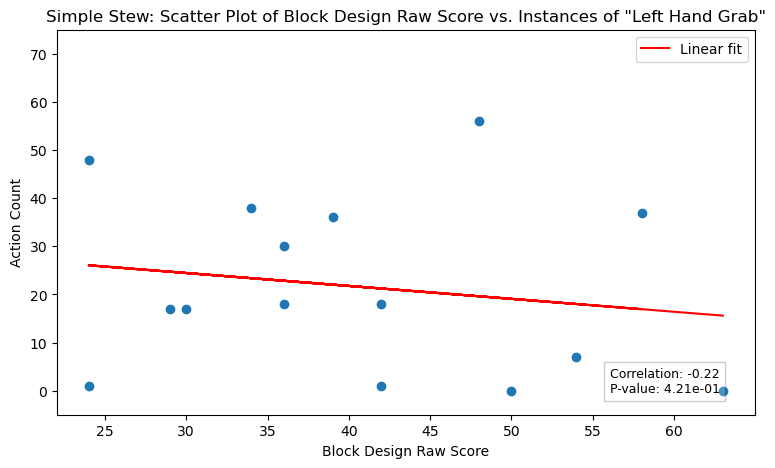

In [253]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Grab'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Grab'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Grab'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Instances of "Left Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(-5,75)
file_path = os.path.join(folder_path, '16 SS_CountLeftHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

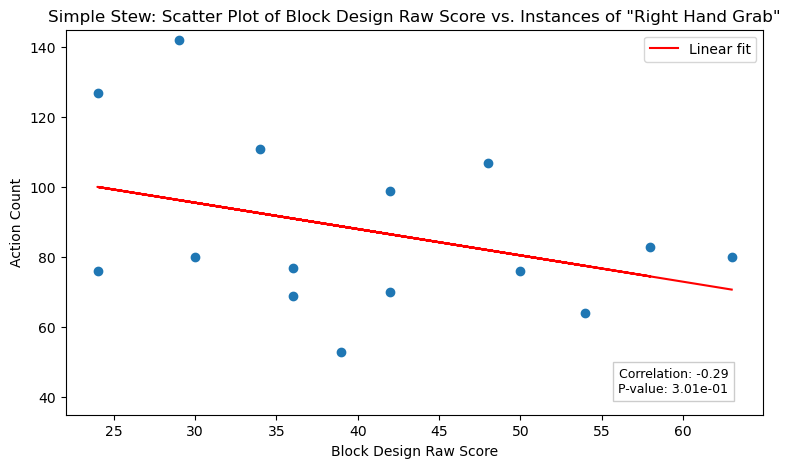

In [254]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Grab'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Grab'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Grab'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Instances of "Right Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.ylim(35,145)
plt.legend()
file_path = os.path.join(folder_path, '17 SS_CountRightHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

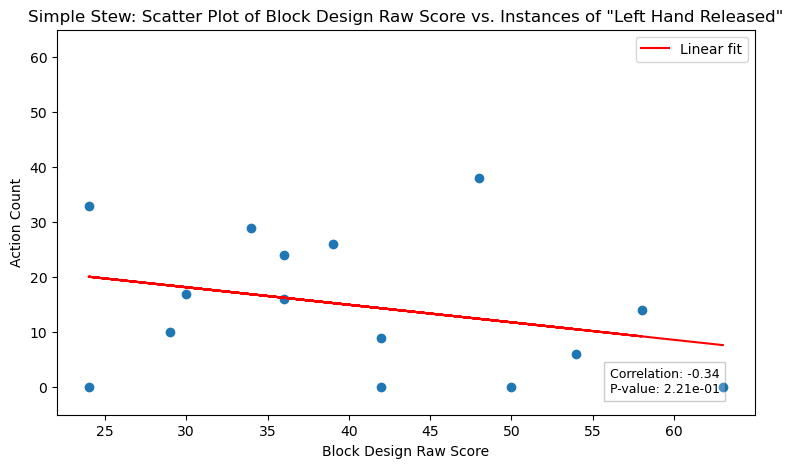

In [256]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Released'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Released'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Released'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Instances of "Left Hand Released"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(-5,65)
file_path = os.path.join(folder_path, '18 SS_CountLeftHandReleased.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

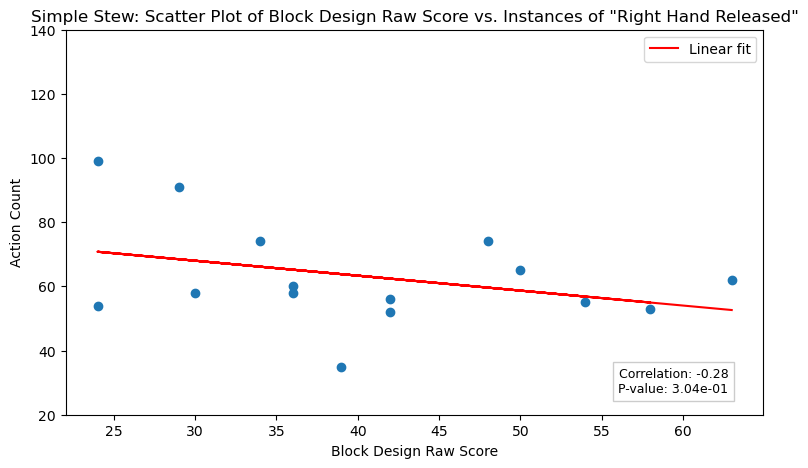

In [257]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Released'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Released'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Released'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Instances of "Right Hand Released"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(20,140)
file_path = os.path.join(folder_path, '19 SS_CountRightHandReleased.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Missed Action Type & Block Design Score

In [232]:
actiontype_missed=pd.read_csv('ActionTypeMissed_SimpleStew.csv')

In [233]:
actiontype_missed = actiontype_missed.rename(columns={
    'Left Hand Grab': 'Left Hand Grab - Missed',
    'Right Hand Grab': 'Right Hand Grab - Missed'
})

In [234]:
actiontype_missed = actiontype_missed[['Participant','Left Hand Grab - Missed','Right Hand Grab - Missed']]
final_df=pd.merge(final_df, actiontype_missed, on ='Participant', how= 'inner')
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Add Onion,...,Add Carrot,Add Potato,Error to Actions Ratio,Chopped,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released,Left Hand Grab - Missed,Right Hand Grab - Missed
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296,28,33,...,40,23,0.016667,19,18,16,69,58,1,2
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909,28,35,...,35,19,0.061321,25,37,14,83,53,8,5
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800,28,26,...,83,23,0.208333,38,18,9,99,52,8,37
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685,32,55,...,70,17,0.031034,38,38,29,111,74,3,6
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259,28,0,...,63,27,0.046512,37,48,33,127,99,4,12
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096,32,28,...,35,22,0.006135,31,7,6,64,55,1,0
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409,30,48,...,64,22,0.111465,39,56,38,107,74,15,20
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559,32,24,...,35,21,0.087432,33,36,26,53,35,8,8
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090,28,57,...,40,20,0.055046,27,30,24,77,60,5,7
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442,28,54,...,40,33,0.004717,40,17,17,80,58,0,1


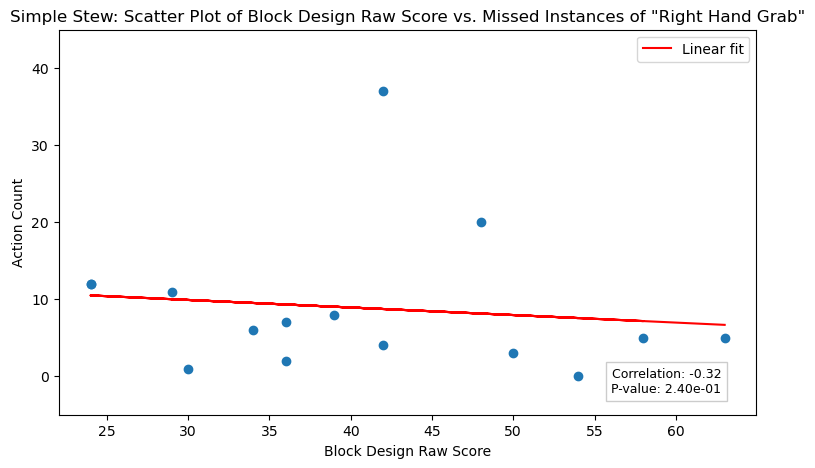

In [258]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Right Hand Grab - Missed'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Missed Instances of "Right Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(-5,45)
file_path = os.path.join(folder_path, '20 SS_MissedRightHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

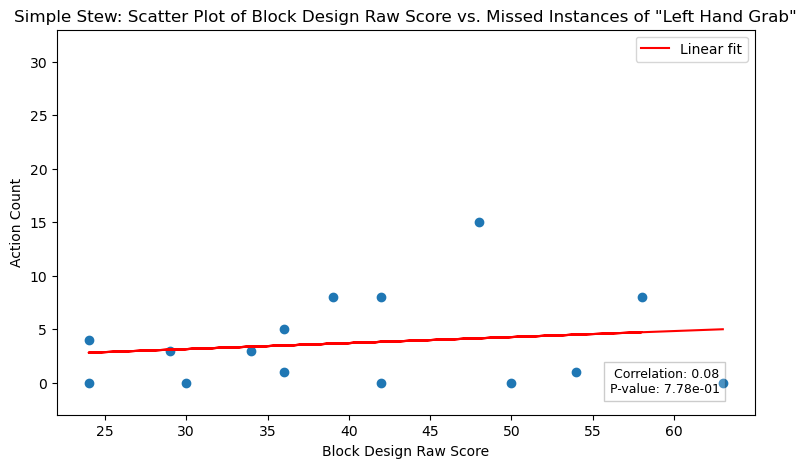

In [260]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Left Hand Grab - Missed'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Missed Instances of "Left Hand Grab"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Action Count')
plt.legend()
plt.ylim(-3,33)
file_path = os.path.join(folder_path, '21 SS_MissedLeftHandGrab.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

#### Interacted objects per step & Block design score

In [237]:
IntOb = pd.read_csv('InteractedObjects_PerStep.csv')

In [238]:
Objects = IntOb[IntOb['Completed Step'] == 'Add Tomtato']
Ob_specific = Objects[['Participant', 'Interacted Objects']]
Ob_specific = Ob_specific.rename(columns={'Interacted Objects': 'Object Count - Add Tomtato'})
final_df=pd.merge(final_df, Ob_specific, on ='Participant', how= 'inner')


In [239]:
Objects = IntOb[IntOb['Completed Step'] == 'Add Potato']
Ob_specific = Objects[['Participant', 'Interacted Objects']]
Ob_specific = Ob_specific.rename(columns={'Interacted Objects': 'Object Count - Add Potato'})
final_df=pd.merge(final_df, Ob_specific, on ='Participant', how= 'inner')

In [240]:
Objects = IntOb[IntOb['Completed Step'] == 'Add Carrot']
Ob_specific = Objects[['Participant', 'Interacted Objects']]
Ob_specific = Ob_specific.rename(columns={'Interacted Objects': 'Object Count - Add Carrot'})
final_df=pd.merge(final_df, Ob_specific, on ='Participant', how= 'inner')


In [241]:
#Objects = IntOb[IntOb['Completed Step'] == 'Pour Broth']
#Ob_specific = Objects[['Participant', 'Interacted Objects']]
#Ob_specific = Ob_specific.rename(columns={'Interacted Objects': 'Object Count - Pour Broth'})
#final_df=pd.merge(final_df, Ob_specific, on ='Participant', how= 'inner')


In [242]:
Objects = IntOb[IntOb['Completed Step'] == 'Add Onion']
Ob_specific = Objects[['Participant', 'Interacted Objects']]
Ob_specific = Ob_specific.rename(columns={'Interacted Objects': 'Object Count - Add Onion'})
final_df=pd.merge(final_df, Ob_specific, on ='Participant', how= 'outer')

In [243]:
final_df['Object Count - Add Onion'] = final_df['Object Count - Add Onion'].fillna(0)
final_df['Object Count - Add Onion'] = final_df['Object Count - Add Onion'].round().astype(int)
final_df

,Participant,Block Design Raw Score,Total Actions,Total Time Spent,Total Missed Interactions,Total Object Interactions,Time Spent S.D,Action Count S.D,Total Completed Steps,Add Onion,...,Left Hand Grab,Left Hand Released,Right Hand Grab,Right Hand Released,Left Hand Grab - Missed,Right Hand Grab - Missed,Object Count - Add Tomtato,Object Count - Add Potato,Object Count - Add Carrot,Object Count - Add Onion
0,C001,36,180,241.813972,3.0,177,19.373010,15.033296,28,33,...,18,16,69,58,1,2,25,23,39,33
1,C003,58,212,368.939742,13.0,199,35.630609,18.443909,28,35,...,37,14,83,53,8,5,17,17,34,35
2,C006,42,216,258.609221,45.0,171,19.902276,24.180800,28,26,...,18,9,99,52,8,37,22,21,53,25
3,C008,34,290,316.882270,9.0,281,20.357014,27.190685,32,55,...,38,29,111,74,3,6,34,16,69,53
4,C009,24,344,450.877417,16.0,328,47.383847,46.421259,28,0,...,48,33,127,99,4,12,32,27,63,0
5,C012,54,163,240.627667,1.0,162,14.958293,15.122096,32,28,...,7,6,64,55,1,0,20,22,35,28
6,C013,48,314,530.895012,35.0,279,35.520103,25.382409,30,48,...,56,38,107,74,15,20,25,21,62,45
7,C016,39,183,185.527859,16.0,167,11.689684,18.523559,32,24,...,36,26,53,35,8,8,21,20,33,21
8,C017,36,218,335.729737,12.0,206,25.446555,20.384090,28,57,...,30,24,77,60,5,7,24,19,38,55
9,C020,30,212,320.340694,1.0,211,17.424497,18.023442,28,54,...,17,17,80,58,0,1,23,33,40,54


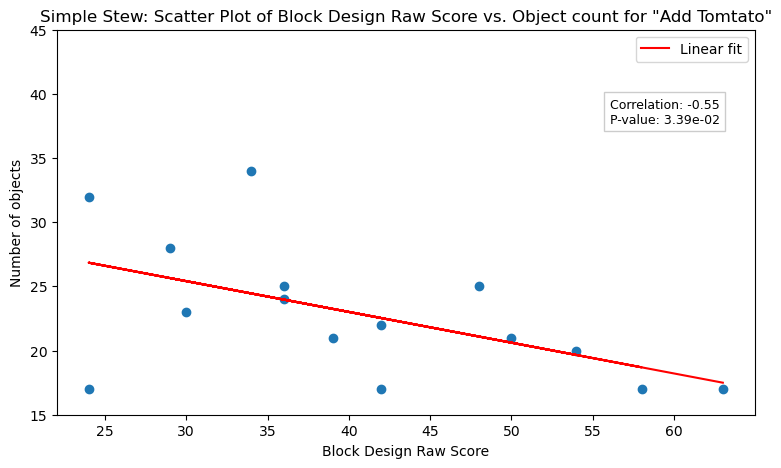

In [262]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add Tomtato'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add Tomtato'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add Tomtato'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.75, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Object count for "Add Tomtato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(15,45)
plt.legend()
file_path = os.path.join(folder_path, '22 SS_ObjectCountAddTomtato.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

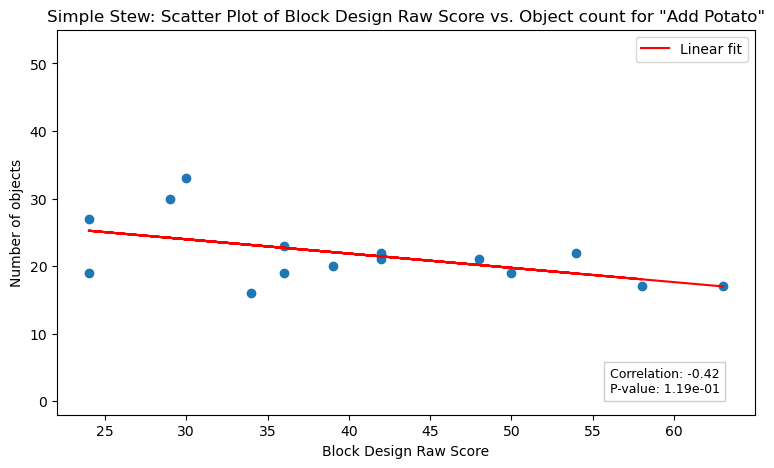

In [263]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add Potato'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add Potato'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add Potato'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Object count for "Add Potato"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(-2,55)
plt.legend()
file_path = os.path.join(folder_path, '23 SS_ObjectCountAddPotato.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

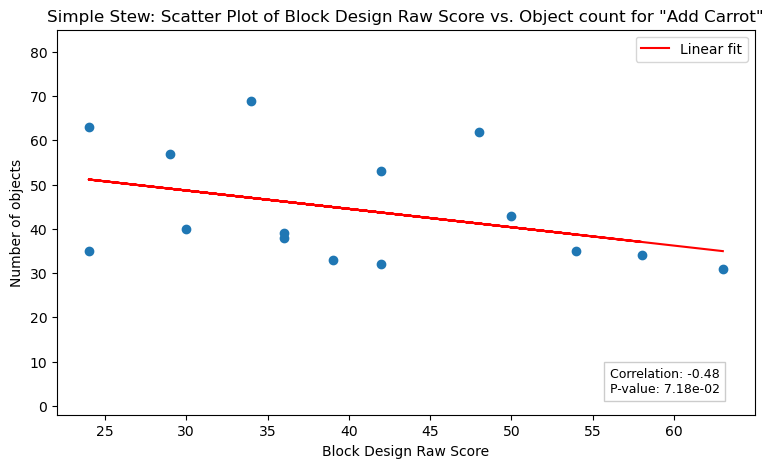

In [264]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add Carrot'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add Carrot'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add Carrot'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Object count for "Add Carrot"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(-2,85)
plt.legend()
file_path = os.path.join(folder_path, '24 SS_ObjectCountAddCarrot.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

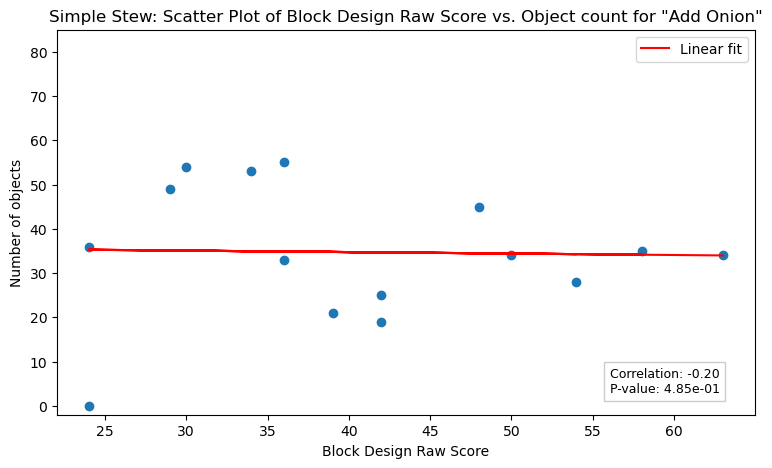

In [265]:
correlation, p_value = spearmanr(final_df['Block Design Raw Score'], final_df['Object Count - Add Onion'])
plt.figure(figsize=(9,5))
plt.scatter(final_df['Block Design Raw Score'], final_df['Object Count - Add Onion'])

# Calculate linear fit
slope, intercept = np.polyfit(final_df['Block Design Raw Score'], final_df['Object Count - Add Onion'], 1)
fit_line = slope * final_df['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(final_df['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Stew: Scatter Plot of Block Design Raw Score vs. Object count for "Add Onion"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Number of objects')
plt.ylim(-2,85)
plt.legend()
file_path = os.path.join(folder_path, '26 SS_ObjectCountAddOnion.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()